In [1]:
# [IMPORT] Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# [IMPORT] Helper Functions
from utils import load_dataset, display_dataset_info, evaluate_model, plot_metrics, plot_cv_accuracy

# [IMPORT] scikit-learn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# load dataset
dataset = load_breast_cancer()

# convert load DataFrame, features and targets of dataset
df, X, y = load_dataset(dataset)

# display dataset information
# display_dataset_info(df, features=True, target=True, null_count=True, class_dist=True, info=True, describe=True)

In [3]:
# split data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = LogisticRegression(max_iter=4000)

# train model
model.fit(X_train_scaled, y_train)

# test model
y_pred = model.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)

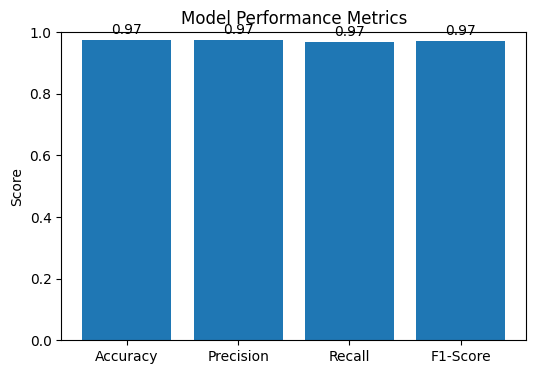

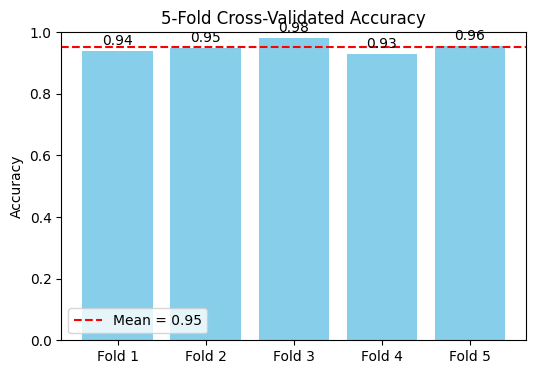

In [5]:
# get model performance dict (accuracy, precision, recall, f1)
metrics = evaluate_model(model, X_test_scaled, y_test)

# display model performance
plot_metrics(metrics)
plot_cv_accuracy(model, X, y, cv=5)

In [6]:
joblib.dump(model, 'models/logreg_breast_cancer.joblib')

['models/logreg_breast_cancer.joblib']